# **Introduction to Exploratory Data Analysis (EDA)**


---


Source: https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676

**Exploratory Data Analysis** (EDA) is the process of visualizing and analyzing data to extract insights from it.

EDA is the process of summarizing important charactersistics of data to gain better understanding of the dataset.


---

**Automobile dataset:** https://drive.google.com/file/d/1g7ewVnbl3zHW33eOD9DoDwJPc4f-OPU2/view

# **Descriptive Statistics**

This helps to describe the basic features of datasets and obtain a brief summary of the data.

In [ ]:
# Import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Read data from csv file
df = pd.read_csv("automobile.csv")

**Get brief summary of data**

In [ ]:
# Display the first five rows of dataframe
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


**.describe()** gives brief overview of the data.
Example, the mean of "diesel" (0.099502) and mean of "gas" (0.900498), shows that 90% of engines run on gas while almost 10% run on diesel.

In [ ]:
# Displays a description of mean, standard deviation, quartiles and maximum & minimum values
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [ ]:
# Get the number of rows and columns of data
df.shape

(201, 29)

**Get summary of categorical data**

Use **.value_counts()** for summarizing categorical data.

The below output tells that our dataset has 115 cars with four doors and 86 cars with two doors.

In [ ]:
df['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

# **Box Plots**

**Box plot** shows us the median of the data, which represents where the middle data point is. Using box plots is another way of analyzing numerical data.

The **upper quartile** represent the 75th percentile of the data.

The **lower quartile** represent the 25th percentile of the 
data.

The **upper and lower extremes** shows us the extreme eneds of the distribution of our data. it also represents ouliers, which occur outside the upper and lower extremes.


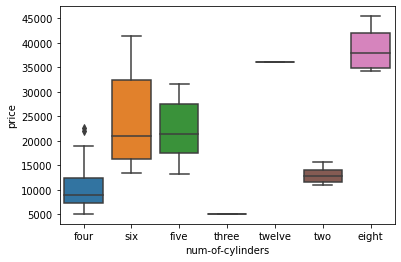

In [ ]:
# Show the distribution of price for cars with different number of cylinders
sns.boxplot(x = 'num-of-cylinders', y = 'price', data = df)

# **Scatter plots**

**Scatter plots**  are used to understand the relationships between contrinuous variables. Scatter plots represent each relationship between two continuous variables as individual data point in a 2D graph.

For example, engine size and price are continuous variables in the dataset. Could engine size predict the price of the car?

**.scatter()** method of matplotlib library will be used to visualize the scatter plot 

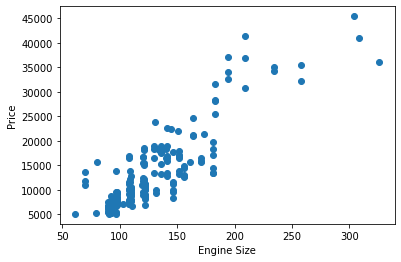

In [ ]:
plt.scatter(df['engine-size'], df['price'])
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

From the output above, we can interpret that **there is a linear relationship** between engine size and price.

Cars with bigger engine size might be more expensive than cars with small-sized engines.

# **Histograms**

**Histogram** shows us the frequency distribution of a variable.
It partitions the spread of numeric data into parts called **"bins"** then counts the number of data points that fall into each bin.

The vertical axis represents the numberr of data points in each bins.

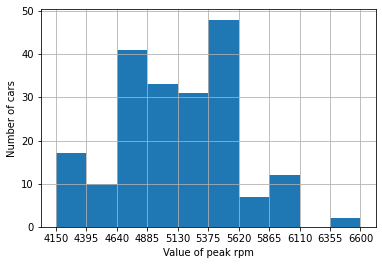

In [ ]:
count, bin_edges = np.histogram(df['peak-rpm'])
df['peak-rpm'].plot(kind='hist', xticks = bin_edges)
plt.xlabel('Value of peak rpm')
plt.ylabel('Number of cars')
plt.grid()
plt.show()

The above output tells that there are 10 cars with peak rpm between 4395 and 4640, around 42 cars with peak rpm between 4640 and 4885 and so on.

# **Grouping of Data**

Suppose you want to know the average price of different types of vehicles and observe how they differ according to body styles and number of doors.

A nice way to do this would be to group the data according to "body-style" and "num-of-doors". Then see the average pricess across each category.

The **groupby()** method from Pandas library helps us to accomplish this task.

In [ ]:
df_temp = df[['num-of-doors', 'body-style', 'price']]

df_group = df_temp.groupby(['num-of-doors', 'body-style'], as_index=False).mean()

df_group

,num-of-doors,body-style,price
0,four,hatchback,8372.000000
1,four,sedan,14490.687500
2,four,wagon,12371.960000
3,two,convertible,21890.500000
4,two,hardtop,22208.500000
5,two,hatchback,10230.793103
6,two,sedan,14283.000000


The above output tells us that two convertibles and two hardtop are the most expensive cars. While. four dour hatchbacks are the cheapest.

Using the **pivot()** method, we can convert the table above into a pivot table, which would allow us to read the table in a better fashion.

In [ ]:
df_pivot = df_group.pivot(index = 'body-style', columns = 'num-of-doors')

df_pivot

price              
num-of-doors        four           two
body-style                            
convertible          NaN  21890.500000
hardtop              NaN  22208.500000
hatchback      8372.0000  10230.793103
sedan         14490.6875  14283.000000
wagon         12371.9600           NaN

The price of data becomes a rectangular grid which is now easier to read.

# **Handling missing values**

* When no data value is stored for a feature in a particular observation, we say this feature has missing values.

* When some of your data is missing, it can lead to weak or biased analysis.

* We can detect missing values by applying **isnull()** method over the dataframe.

* The **isnull()** method returns a rectangular grid of boolean values which tells us if a particular cell in a dataframe has missing value or not.

In [ ]:
df.isnull()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
199,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Analyzing a grid of this style to detect missing value is not very convenient.
We will **use heatmaps** to visually detect the missing values.

# **Heatmaps**

**Heatmap** takes a rectangular data grid as input then assigns a color intensity to each data cell based on the data value of the cell.

This is a great way to get visual clues about the data.

We will generate a heatmap of the output of isnull() method in order to detect missing values.

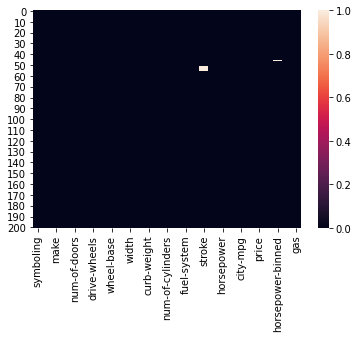

In [ ]:
sns.heatmap(df.isnull())

plt.show()

This indicates that "stroke" and "horsepower-binned" columns have few missing values

# **Ways to handle missing values:**


1.   **Delete.** 
> The **dropna()** method from Pandas library can be used to delete rows or columns with missing values.
> However, deleting data might cause huge amount of information loss.

2.   **Impute**
> Replacing data  might be a better option than deleting.
> **Standard technique:** replace missing values with the **mean** value of the enire column.
> The **fillna()** method from Pandas library can be used to accomplish this task.

3.   **Predictive filling**
> Fill missing values through predictive filling.
> The **interpolate()** method will perform a linear interpolation in order to "guess" the missing values and fill results in the dataset. 







# **ANOVA (Analysis of Variance)**

ANOVA is a statistical method which is used for figuring out the relation between different groups of categorical data.

The ANOVA test gives us two measures results:


1.   **F-test score:** It calculates the variation between sample group means divided by variation within samle group.
2.   **P-value:** it shows us the confidence degree. It tells us whether the obtained result is statistically significant to us.


The following bar chart shows the average price of different car makes:



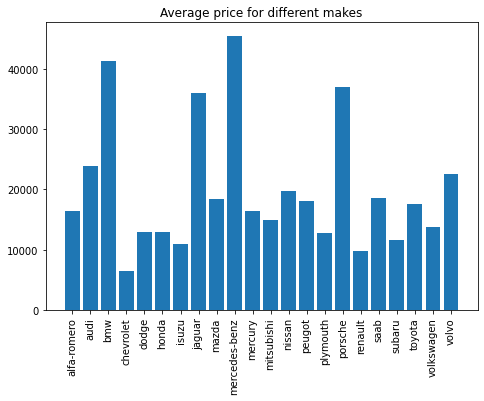

In [ ]:
# Bar Chart using Matplotlib
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

x = df['make']
y = df['price']

plt.xticks(rotation='vertical')
plt.title('Average price for different makes')
ax.bar(x, y)

plt.show()

The average price for "volvo" and "audi" are almost the same.

> There is a small variance betwenn "volvo" and "audi"

The average price of "jaguar" and "honda" differ significantly.

> The variance between "jaguar" and "honda" is significantly high.

The ANOVA test can be performed using the **f_oneway()** method from Scipy library.

In [ ]:
temp_df = df[['make' , 'price']].groupby(['make'])

stats.f_oneway(temp_df.get_group('audi')['price'], temp_df.get_group('volvo')['price'])

F_onewayResult(statistic=0.014303241552631388, pvalue=0.9063901597143602)

* The result confirms what we guessed first. 

* Since the variance between price of "audi" and "volvo" is very small, we got an F-test score which is very small (around 0.01) and a p-value around 0.9.

* Testing this between "jaguar" and "honda"

In [ ]:
stats.f_oneway(temp_df.get_group('jaguar')['price'], temp_df.get_group('honda')['price'])

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

* We got a very high F-test score (around 401) with a p-value around 1.05*10^-11 because the variance between the average price of "jaguar" and "honda" is huge.

* In conclusion:
> **small variance:** small F-test score, larger p-value      
> **high variance:** high F-test score, smaller p-value

# **Correlation**

**Correlatio**n is a statistical metric for measuring to what extent different variables are interdependent.

When we look at two variables over time, if one variable changes. how does this effect change in other variable?

The **corr()** function is used to see the correlation between different variables. 

Then we can plot a heatmpa over this output to visualize the results:

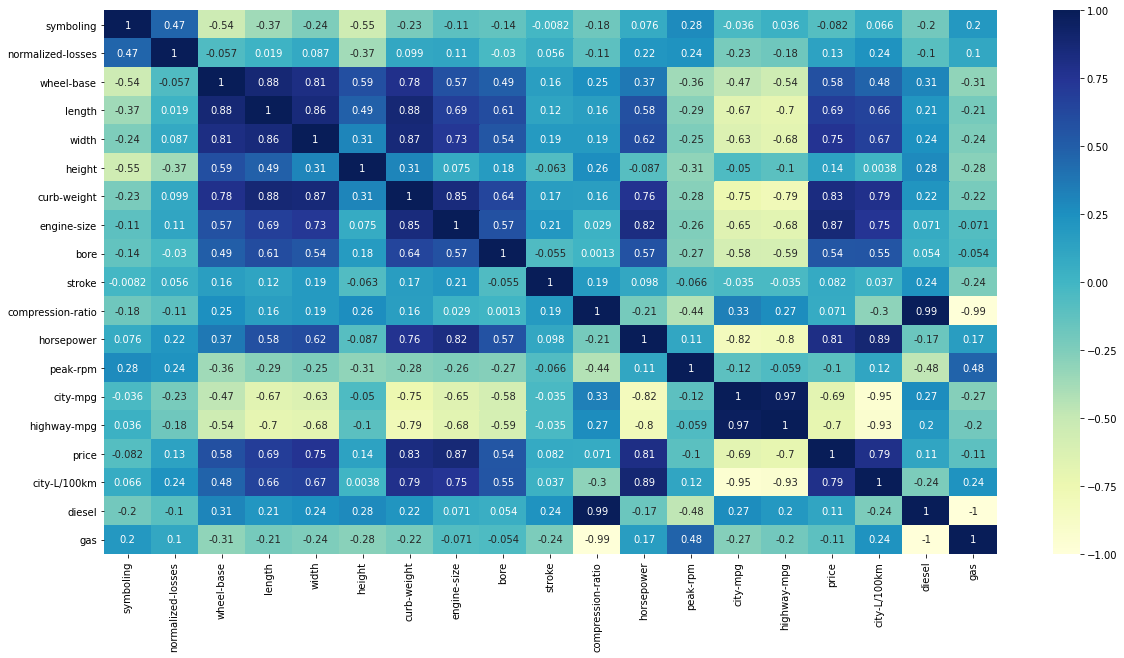

In [ ]:
correlation_matrix = df.corr()

f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1, linewidths = 0, cmap="YlGnBu")

plt.show()

Based from the above heatmap:
* engine size and price are possitively correlated (score of 0.87)
> therefore, cars with larger engines are more expensive

* highway-mpg and price are negatively correlated (score of -0.7) with each other
> expensive cars have less MPG compared to cheaper cars

# **Regression Plots**

Regression plot is use to verify the relationship stated above

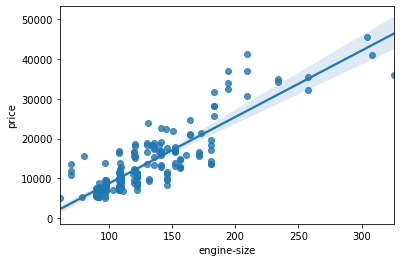

In [ ]:
sns.regplot(x='engine-size' , y='price', data=df)

The above plot shows the positive correlation between engine size and price.

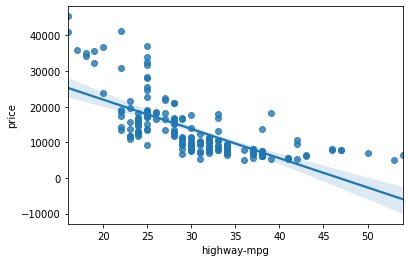

In [ ]:
sns.regplot(x='highway-mpg', y='price', data=df)

The above plot shows the negative correlation between "highway-mpg" and "price"